<a href="https://colab.research.google.com/github/WahyuKhairi06/VisualisasiData_WahyuKhairi/blob/main/SentimenOpiniFilm/Sentimen_Opini_Film.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

Mengimport library yang dibutuhkan dalam membaca dataset dan memvisualisasikan data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


# **Membaca Dataset**


In [57]:
data = pd.read_csv('/content/dataset_tweet_sentiment_opini_film.csv')
data.head(10)

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."
5,6,negative,tolong editingnya yg bagus ya. Saya sering kec...
6,7,negative,Kecewa dgn salah satu aktornya yg ternyata pen...
7,8,negative,Kecewa parah sama film the guys. Dear @raditya...
8,9,negative,Banyak yg kecewa abis nonton film ini :(
9,10,negative,#TheMummy 2017 adalah film yang paling memgece...


from matplotlib import pyplot as plt
_df_3['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

Dataset Ini Berisi 3 kolom :
- Id → Identitas data
- Sentiment → Sentimen opini (positif, negatif, netral)
- Text Tweet → Isi opini dalam bentuk teks

# **Melihat Informasi type data dari dataset yang dimiliki**


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          200 non-null    int64 
 1   Sentiment   200 non-null    object
 2   Text Tweet  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


# **Melihat jumlah dan jenis kategori unik dalam kolom "Sentiment"**

In [59]:
# Assuming 'Sentiment' column is the qualitative column
unique_categories = data['Sentiment'].unique()
num_unique_categories = len(unique_categories)

print(f"Number of unique categories in the 'Sentiment' column: {num_unique_categories}")
print(f"Unique categories: {unique_categories}")


Number of unique categories in the 'Sentiment' column: 2
Unique categories: ['negative' 'positive']


kode ini berguna untuk memahami struktur data yang dimiliki dataset untuk kebutuhan analisis lebih Lanjut


# **Melihat Data kosong atau blank yang dimiliki dataset**

In [60]:
data.isnull().sum()

,0
Id,0
Sentiment,0
Text Tweet,0


# **Memberikan Nama Kolom Pada Dataset untuk kebutuhan visualisasi**

In [61]:
kolom_sentimen = 'Sentiment'
kolom_opini = 'Text Tweet'

# **1. Membuat Bar Chart**

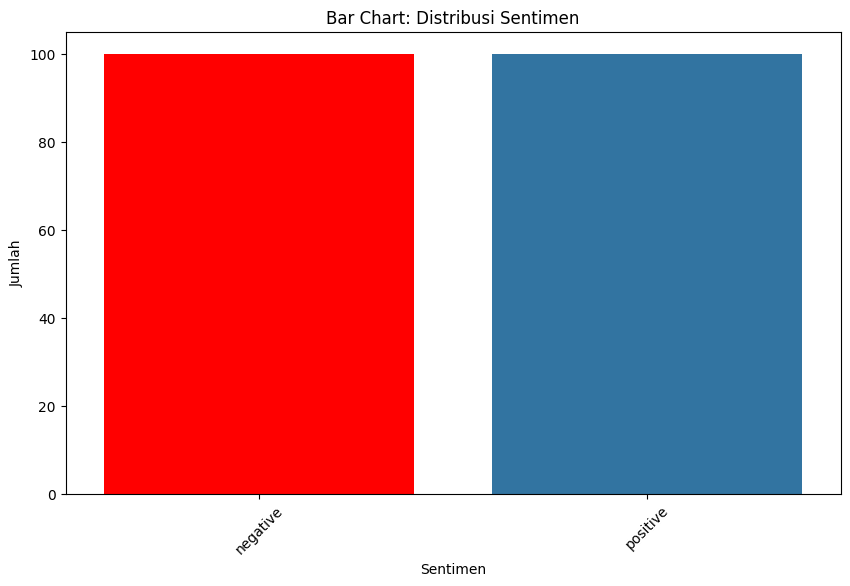

In [62]:
# Assuming 'Sentiment' column is the qualitative column
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

# Customize negative sentiment bar color to red
negative_sentiment_index = list(sentiment_counts.index).index('negative')
ax.patches[negative_sentiment_index].set_facecolor('red')

plt.title('Bar Chart: Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


Visual ini berguna untuk memlihat Distribusi jumlah opini berdasarkan sentimen.

# **2. Membuat Pie Chart**

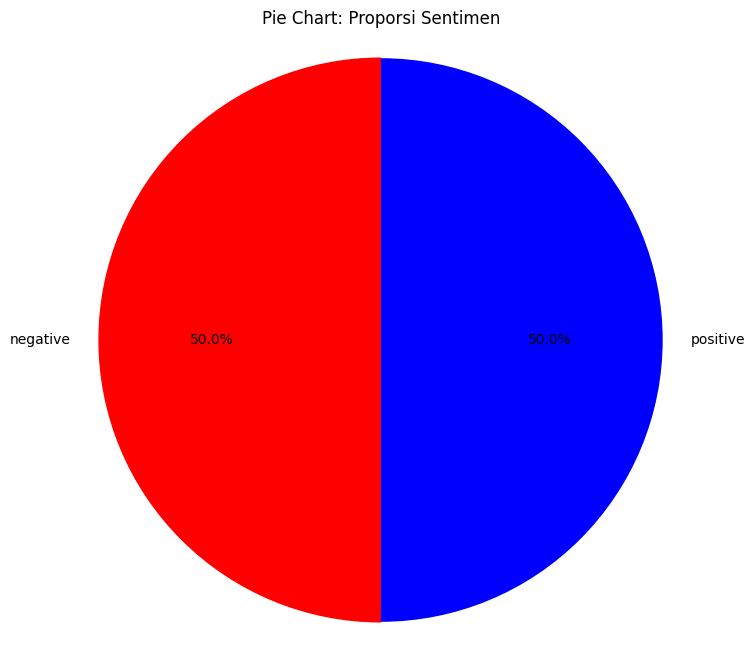

In [63]:
# Assuming 'Sentiment' column is the qualitative column
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust figure size for better pie chart visualization

# Define colors for the pie chart slices
colors = ['skyblue', 'blue', 'red'] # Example colors, adjust as needed

# Create the pie chart
wedges, texts, autotexts = plt.pie(sentiment_counts,
                                  labels=sentiment_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors) # Set colors

# Customize the negative sentiment slice color
for i, label in enumerate(sentiment_counts.index):
  if label == 'negative':
    wedges[i].set_color('red')
    break # Exit loop after changing the color of negative sentiment

plt.title('Pie Chart: Proporsi Sentimen')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Elemen visual ini untuk melihat Proporsi opini berdasarkan sentimen.

# **3. membuat Word Cloud**

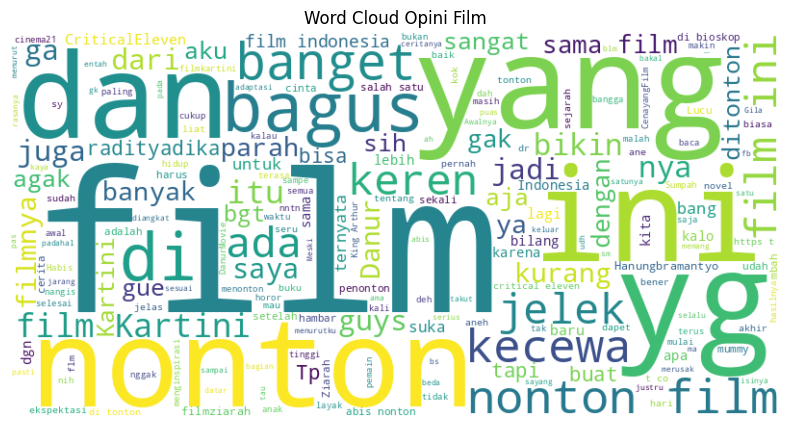

In [71]:
# Gabungkan semua teks opini menjadi satu string
text = " ".join(data[kolom_opini].astype(str))

# Buat Word Cloud
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="viridis"
).generate(text)

# Tampilkan Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Opini Film")
plt.show()


Elemen visual word cloud ini berguna untuk melihat kemungkinan Kata-kata yang sering muncul dalam opini.